In [1]:
import sklearn
import numpy as np
import os

In [71]:
def extract_data(xy_filepath):
    xy = np.genfromtxt(xy_filepath, delimiter=',')
    return xy[:, :-1].astype(np.float), xy[:, -1].astype(int)
#     return xy[:, [1, 3, 5, 7]].astype(np.float), xy[:, -1].astype(int)      # roundsWon, map_roundsWon, avg adr, max adr
#     return xy[:, [2]].astype(np.float), xy[:, -1].astype(int)

In [72]:
# load data into global variable space
# split between test and train sets
FRAC_TRAIN = 0.8
X, y = extract_data('./Xy.txt')
num_train = int(FRAC_TRAIN * len(X))
indices = np.random.permutation(len(X))
train_indices, test_indices = indices[:num_train], indices[num_train:]
X_train = X[train_indices, :]
y_train = y[train_indices]
X_test = X[test_indices, :]
y_test = y[test_indices]

Text(0.5, 0, 'Feature (v): difference in [k - d]')

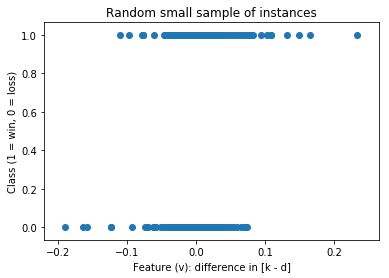

In [82]:
import matplotlib.pyplot as plt

rand_indices = indices[:400]
x_4 = X[rand_indices, 4]   # k - d difference
y_4 = y[rand_indices]
plt.scatter(x_4, y_4)
plt.title('Random small sample of instances')
plt.ylabel('Class (1 = win, 0 = loss)')
plt.xlabel('Feature (v): difference in [k - d]')

In [63]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import DictVectorizer

clf = LinearSVC(loss='hinge')
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

train_acc = sum([1 if y == yhat else 0 for y, yhat in zip(y_train, pred_train)]) / len(y_train)
test_acc = sum([1 if y == yhat else 0 for y, yhat in zip(y_test, pred_test)]) / len(y_test)

c:\users\robin zhang\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [64]:
print('train accuracy', train_acc)
print('test accuracy', test_acc)

train accuracy 0.5499888068054622
test accuracy 0.5603510028653295


In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=8)
clf = clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

train_acc = sum([1 if y == yhat else 0 for y, yhat in zip(y_train, pred_train)]) / len(y_train)
test_acc = sum([1 if y == yhat else 0 for y, yhat in zip(y_test, pred_test)]) / len(y_test)

print('train accuracy', train_acc)
print('test accuracy', test_acc)

train accuracy 0.6296619655249608
test accuracy 0.6003760744985673


Feature ranking:
1. feature 4 (0.246492)
2. feature 5 (0.165104)
3. feature 6 (0.158797)
4. feature 1 (0.122295)
5. feature 0 (0.109981)
6. feature 7 (0.082623)
7. feature 3 (0.059323)
8. feature 2 (0.055386)


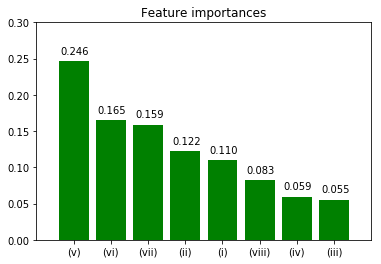

In [48]:
import matplotlib.pyplot as plt

romans = ['(i)', '(ii)', '(iii)', '(iv)', '(v)', '(vi)', '(vii)', '(viii)']

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="g",
        align="center")
for i, v in enumerate(importances[indices]):
    plt.text(i - 0.35, v + 0.01, '{0:.3f}'.format(v))
indices = [romans[i] for i in indices]
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, .3])
plt.show()